In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import pywaffle as Waffle
plt.rcParams['font.family'] = 'serif' 

In [9]:
df = pd.read_csv('consoles.csv')
df.head()


,Platform,Type,Company,Released,Units sold
0,PlayStation,Home,Sony,1994,102490000
1,PlayStation 2,Home,Sony,2000,155000000
2,PlayStation 3,Home,Sony,2006,87400000
3,PlayStation 4,Home,Sony,2013,117200000
4,PlayStation 5,Home,Sony,2020,65600000


In [3]:
df

,Platform,Type,Company,Released,Units sold
0,PlayStation,Home,Sony,1994,102490000
1,PlayStation 2,Home,Sony,2000,155000000
2,PlayStation 3,Home,Sony,2006,87400000
3,PlayStation 4,Home,Sony,2013,117200000
4,PlayStation 5,Home,Sony,2020,65600000
5,PlayStation Portable,Handheld,Sony,2004,82000000
6,PlayStation Vita,Handheld,Sony,2011,15000000
7,Color TV-Game,Dedicated,Nintendo,1977,3000000
8,Famicom Disk System,Home console add-on,Nintendo,1986,4500000
9,Game & Watch,Dedicated handheld,Nintendo,1980,43400000


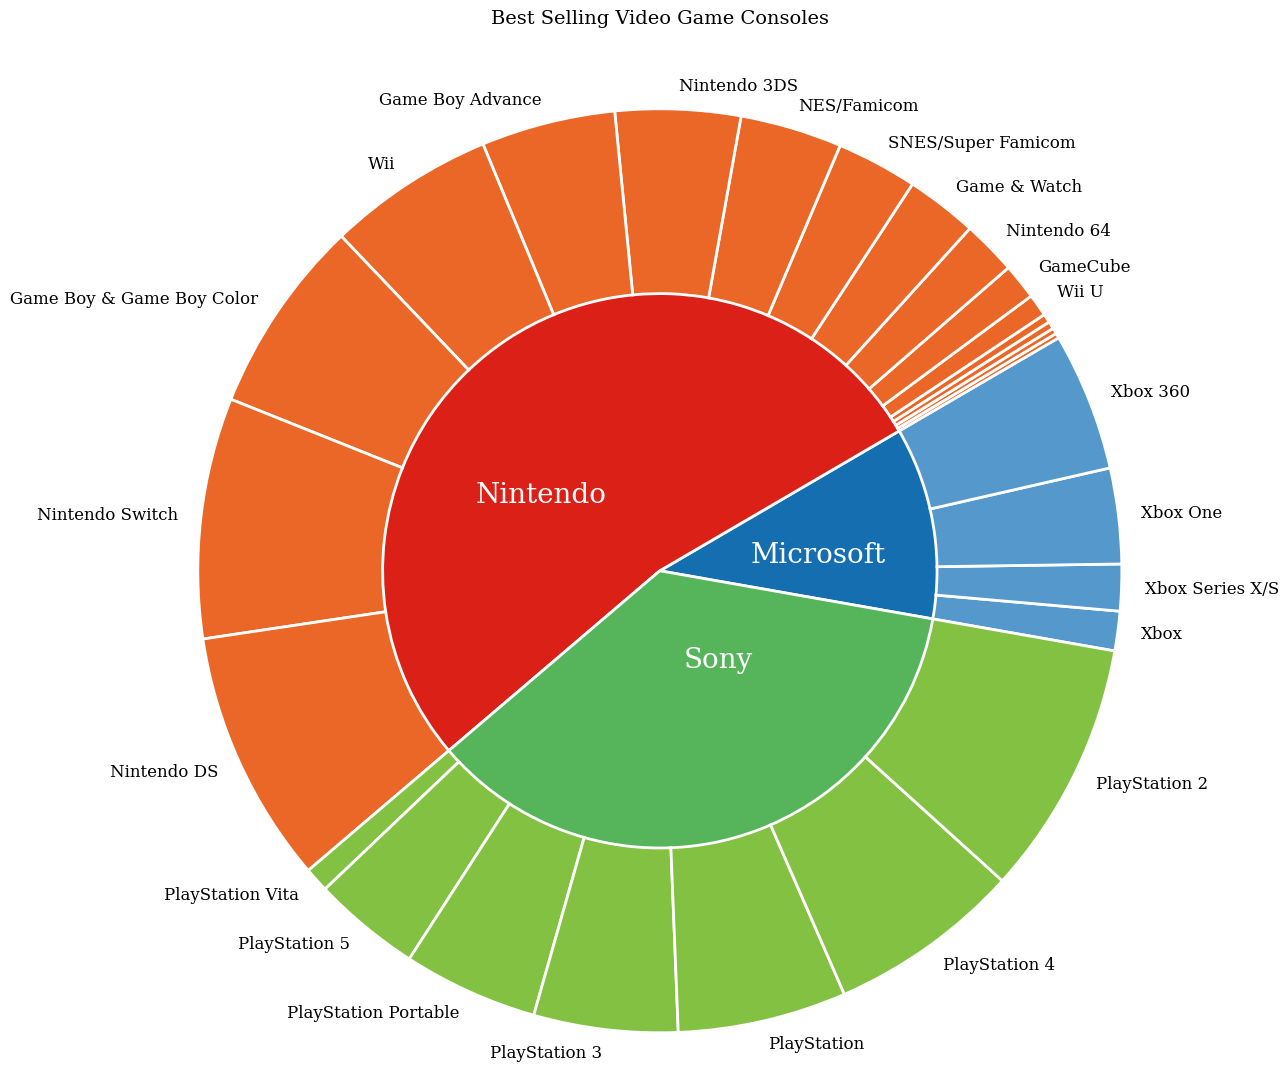

In [4]:
inner_colors = {"Microsoft": "#156EAF", "Nintendo": "#DB2018", "Sony": "#56B45B"}
outer_colors = {"Microsoft": "#5599CC", "Nintendo": "#EA6727", "Sony": "#83C143"}


inner_df = df.groupby("Company", as_index=False)["Units sold"].sum()
inner_df["Color"] = inner_df["Company"].map(inner_colors)


outer_df = df.sort_values(by=["Company", "Units sold"], ascending=[True, True])
outer_df["Color"] = outer_df["Company"].map(outer_colors)

inner_labels = inner_df["Company"]
inner_sizes = inner_df["Units sold"]
inner_colors_list = inner_df["Color"]

outer_labels = outer_df["Platform"].where(outer_df["Units sold"] >= 10000000, "")
outer_sizes = outer_df["Units sold"]
outer_colors_list = outer_df["Color"]




fig, ax = plt.subplots(figsize=(10,10))

ax.axis("equal")  


ax.pie(inner_sizes, labels=inner_labels, colors=inner_colors_list, 
                         radius=1, wedgeprops={"edgecolor": "white", "width": 1,'linewidth':2}, 
                         labeldistance=0.3, textprops={"color": "white", "fontsize": 20}, 
                         startangle=-10)


ax.pie(outer_sizes, labels=outer_labels, colors=outer_colors_list,
       radius=1.5, wedgeprops={"edgecolor": "white", "width": 0.6,'linewidth':2}, labeldistance=1.05,
       textprops={"fontsize": 12}, startangle=-10)

        
plt.title("Best Selling Video Game Consoles", fontsize=14, y=1.2)


plt.show()

In [11]:
df2=pd.read_csv('gen-ai.csv')

In [13]:
df2.sort_index(inplace=True)


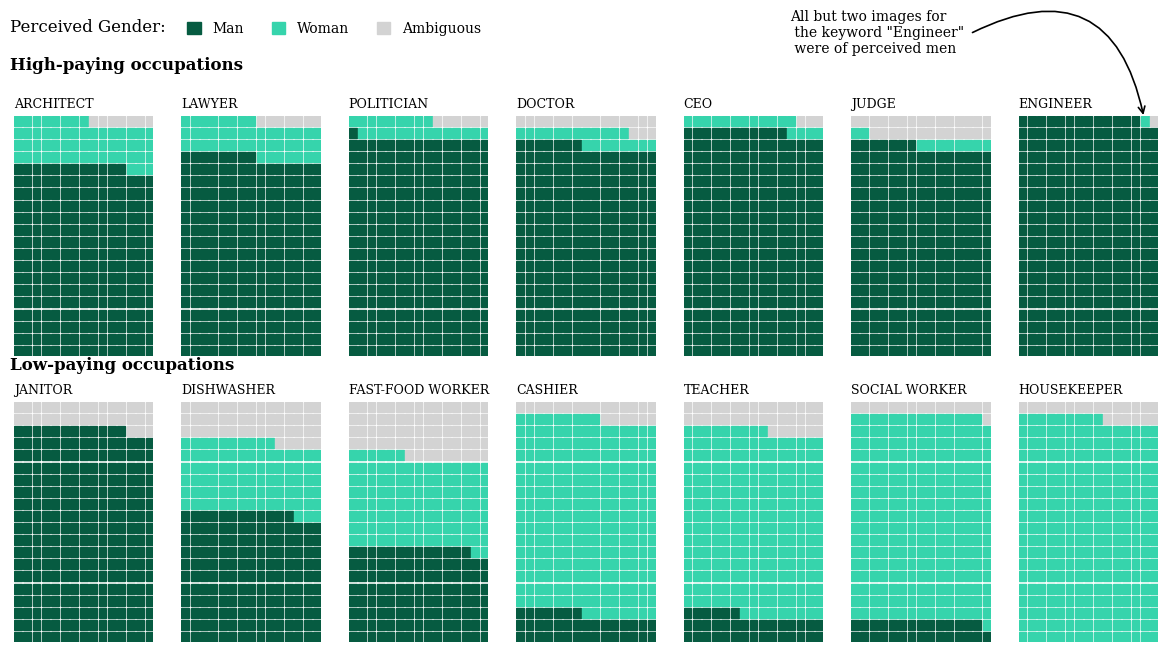

In [15]:
import matplotlib.patches as patches
from pywaffle import Waffle
colors = ["#065B41", "#36D4AC", "#D3D3D3"] 


df_high = df2.iloc[:7]  
df_low = df2.iloc[7:]   
df_combined = pd.concat([df_high, df_low], ignore_index=True)


fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(12, 6))
axes = axes.flatten() 


df_combined.apply(
    lambda row, ax: Waffle.make_waffle(
        rows=20,
        columns=15,
        values=[row["man"], row["woman"], row["ambiguous"]],
        ax=ax[row.name], 
        colors=colors,
        vertical=True
    ),
    axis=1,
    args=(axes,)
)


list(map(lambda ax, title: ax.set_title(title.upper(), fontsize=9, loc='left'), axes[:len(df_combined)], df_combined["occupation"]))


fig.text(0.02, 1.0, "High-paying occupations", fontsize=12, fontweight="bold")
fig.text(0.02, 0.5, "Low-paying occupations", fontsize=12, fontweight="bold")

legend_patches = [
    patches.Patch(color=colors[0], label="Man"),
    patches.Patch(color=colors[1], label="Woman"),
    patches.Patch(color=colors[2], label="Ambiguous")
]

fig.text(0.02, 1.07, "Perceived Gender:", fontsize=12, va="center")

fig.legend(handles=legend_patches, loc="upper center", fontsize=10, ncol=3, frameon=False, bbox_to_anchor=(0.29, 1.101),
           handleheight=1,handlelength=1)

fig.text(
    0.67, 1.1,  
    'All but two images for \n the keyword "Engineer" \n were of perceived men', 
    fontsize=10, 
    ha="left", 
    va="top"
)

arrow = patches.FancyArrowPatch(
    (0.82, 1.06), 
    (0.965, 0.92),  
    transform=fig.transFigure,
    connectionstyle="arc3,rad=-0.65", 
    arrowstyle="->",  
    mutation_scale=12,  
    color="black",  
    linewidth=1.2
)


fig.patches.append(arrow)

plt.tight_layout(pad=2)
plt.savefig("grid.png")
plt.show()